In [1]:
import sys
import numpy as np
from scipy import signal
from scipy.stats import percentileofscore, norm
import datetime as dt
import matplotlib.pyplot as pl
import matplotlib.dates as mdates

In [18]:
def plot(time, nino_dat, ismr_dat, c, N):
    """
    Plots input time series, filtered time series, and phase space plots.
    """
    # parse the input data
    nino_anom = nino_dat["anom"]
    nino_filt = nino_dat["filt"]
    nino_grad = nino_dat["grad"]
    ismr_anom = ismr_dat["anom"]
    ismr_filt = ismr_dat["filt"]
    ismr_grad = ismr_dat["grad"]

    # set up figure
    fig = pl.figure(figsize=[8.5, 11.0])
    axlabfs, tiklabfs, splabfs = 11, 9, 13

    # set up first axis and plot the NINO index
    ax1 = fig.add_axes([0.10, 0.600, 0.85, 0.210])
    ax1.plot(time, nino_anom,
             c="SteelBlue", label="Original", linewidth=0.5)
    ax1.plot(time, nino_filt,
             c="Tomato",
             label="Filtered",
             linewidth=0.5)

    # set up second axis and plot the ISMR index
    ax2 = fig.add_axes([0.10, 0.425, 0.85, 0.175])
    ax2.plot(time, ismr_anom,
             c="SteelBlue", label="Original", linewidth=0.5)
    ax2.plot(time, ismr_filt,
             c="Tomato",
             label="Filtered",
             linewidth=0.5)

    # set up third axis and plot the estimated phases from filtered NINO
    ax3 = fig.add_axes([0.125, 0.10, 0.35, 0.25])
    ax3.plot(nino_grad, np.imag(signal.hilbert(nino_grad)),
             c="Tomato", linewidth=0.5)

    # set up fourth axis and plot the estimated phases from filtered ISMR
    ax4 = fig.add_axes([0.625, 0.10, 0.35, 0.25])
    ax4.plot(ismr_grad, np.imag(signal.hilbert(ismr_grad)),
             c="Tomato", linewidth=0.5)

    # prettify ax1 and ax2
    xlo, xhi = dt.datetime(850, 1, 1), dt.datetime(1850, 12, 31)
    for ax in [ax1, ax2]:
        ax.set_xlim(xlo, xhi)
        XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
        XMinorLocator = mdates.YearLocator(base=10, month=6, day=15)
        # XMinorLocator = mdates.MonthLocator(bymonthday=15, interval=3)
        XMajorFormatter = mdates.DateFormatter("%Y")
        ax.xaxis.set_major_locator(XMajorLocator)
        ax.xaxis.set_minor_locator(XMinorLocator)
        ax.xaxis.set_major_formatter(XMajorFormatter)
        ax.set_ylim(-3.0, 3.0)
        ax.set_yticks(np.arange(-2.0, 2.01, 1.0))
        ax.grid(which="both")
        ax.tick_params(which="major", axis="both", size=8, direction="out")
        ax.tick_params(which="minor", axis="both", size=5, direction="out")
        ax.tick_params(axis="both", labelsize=tiklabfs)
    leg = ax1.legend(loc="upper right")
    for txt in leg.get_texts():
        txt.set_size(tiklabfs)
    ax1.set_ylim(-4., 4.)
    ax1.tick_params(bottom="off", top="on", which="both",
                    labelbottom="off", labeltop="on")
    ax2.set_xlabel("Time", fontsize=axlabfs)
    ax1.set_xlabel("Time", fontsize=axlabfs)
    ax1.xaxis.set_label_position("top")
    ax1.set_ylabel("Nino 3", fontsize=axlabfs)
    ax2.set_ylabel("ISMR", fontsize=axlabfs)

    # prettify ax3 and ax4
    ax3.set_xlabel("Derivative of filtered Nino 3 signal",
                   fontsize=axlabfs)
    ax3.set_ylabel("Hilbert transform",
                   fontsize=axlabfs)
    ax4.set_xlabel("Derivative of filtered ISMR signal",
                   fontsize=axlabfs)
    ax4.set_ylabel("Hilbert transform",
                   fontsize=axlabfs)
    for ax in [ax3, ax4]:
        ax.grid()
        ax.tick_params(axis="both", labelsize=tiklabfs)
        ax.tick_params(which="major", size=8)

    ax1.text(0.01, 1.25,
            "Cutoff Freq. = %f / 12 yrs" % c,
            ha="left", va="center", fontsize=12,
            bbox={"facecolor": "LightCoral", "alpha": 0.5},
            transform=ax1.transAxes,
            )
    ax1.text(0.99, 1.25,
            "Filter order = %f" % N,
            ha="right", va="center", fontsize=12,
            bbox={"facecolor": "LightCoral", "alpha": 0.5},
            transform=ax1.transAxes,
            )

    return fig



In [19]:
def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time


nino_anom = np.genfromtxt('nino_anom.txt', delimiter=',')
ismr_anom = np.genfromtxt('ismr_anom.txt', delimiter=',')

nino_filt = np.genfromtxt('nino_filt.txt', delimiter=',')
ismr_filt = np.genfromtxt('ismr_filt.txt', delimiter=',')


nino_grad = np.gradient(nino_filt, 5)
ismr_grad = np.gradient(ismr_filt, 5)
c = 0.75
N = 1

time = common_time_axis(nino_anom)

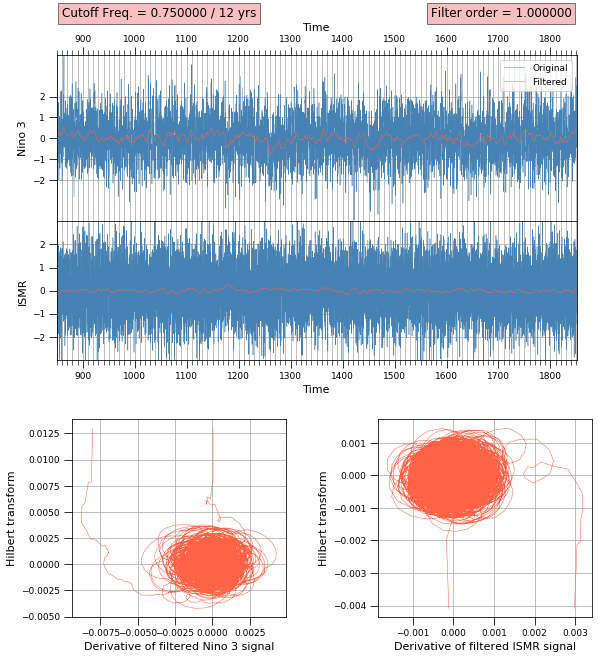

In [20]:
            fig = plot(time,
                       {# nino_dat
                          "anom": nino_anom,
                          "filt": nino_filt,
                          "grad": nino_grad,
                       },
                       {# ismr_dat
                          "anom": ismr_anom,
                          "filt": ismr_filt,
                          "grad": ismr_grad,
                       },
                       c, N,
                       )
pl.savefig('figs1.png', format='png', dpi=1000)

In [25]:
delphi_hist = np.genfromtxt('delphi_hist.csv', delimiter=",", dtype=float).flatten()
delphi_hist_null = np.genfromtxt('delphi_phase_null.csv', delimiter=",", dtype=float).flatten()
delphi_pi = np.genfromtxt('del_phi_orig_pi.txt', delimiter=",", dtype=float).flatten()
delphi_pi_null = np.genfromtxt('delphi_phase_null_pi.csv', delimiter=",", dtype=float).flatten()

delphi_hist_dist_2 = ( delphi_hist + np.pi) % (2 * np.pi )
delphi_hist_null_dist_2 = ( delphi_hist_null + np.pi) % (2 * np.pi )

delphi_hist_dist_2 = delphi_hist_dist_2 / (2*np.pi)
delphi_hist_null_dist_2 = delphi_hist_null_dist_2 / (2*np.pi)

delphi_pi_dist_2 = ( delphi_pi + np.pi) % (2 * np.pi )
delphi_pi_null_dist_2 = ( delphi_pi_null + np.pi) % (2 * np.pi )

delphi_pi_dist_2 = delphi_pi_dist_2 / (2*np.pi)
delphi_pi_null_dist_2 = delphi_pi_null_dist_2 / (2*np.pi)


<ipython-input-26-86d2083616bc>:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  values_hist, bins_hist, _ = ax1.hist(delphi_hist_dist_2, normed=True, bins='fd', alpha=0.5, label='hist', range=(0,1))
<ipython-input-26-86d2083616bc>:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  values_hist_null, bins_hist_null, _ = ax1.hist(delphi_hist_null_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates', range=(-1,1))
<ipython-input-26-86d2083616bc>:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  values_pi, bins_pi, _ = ax2.hist(delphi_pi_dist_2, normed=True, bins='fd', alpha=0.5, label='PI', range=(0,1))
<ipython-input-26-86d2083616bc>:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated i

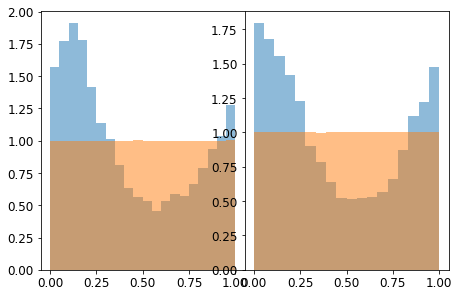

In [26]:
fig = pl.figure(figsize=[7.08, 9.0])
ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.4])
ax2 = fig.add_axes([0.5, 0.1, 0.4, 0.4])

values_hist, bins_hist, _ = ax1.hist(delphi_hist_dist_2, normed=True, bins='fd', alpha=0.5, label='hist', range=(0,1))
values_hist_null, bins_hist_null, _ = ax1.hist(delphi_hist_null_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates', range=(-1,1))

values_pi, bins_pi, _ = ax2.hist(delphi_pi_dist_2, normed=True, bins='fd', alpha=0.5, label='PI', range=(0,1))
values_pi_null, bins_pi_null, _ = ax2.hist(delphi_pi_null_dist_2, normed=True, bins=bins_pi, alpha=0.5, label='PI_twin_surrogates', range=(-1,1))

<ipython-input-27-7a47da55b036>:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  values_hist, bins_hist, _ = ax1.hist(delphi_hist_dist_2, normed=True, bins='fd', alpha=0.5, label='hist', range=(0,1))
<ipython-input-27-7a47da55b036>:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  values_hist_null, bins_hist_null, _ = ax1.hist(delphi_hist_null_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates', range=(-1,1))


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


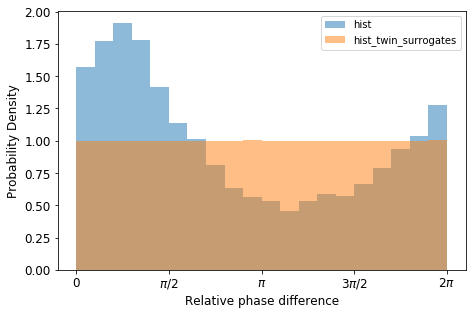

In [27]:
fig = pl.figure(figsize=[7.08, 9.0])
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.4])
values_hist, bins_hist, _ = ax1.hist(delphi_hist_dist_2, normed=True, bins='fd', alpha=0.5, label='hist', range=(0,1))
values_hist_null, bins_hist_null, _ = ax1.hist(delphi_hist_null_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates', range=(-1,1))
ax1.set_xticks(np.arange(0, 1.1, step=0.25))
ax1.set_xticklabels(['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'])
ax1.set_xlabel('Relative phase difference')
ax1.set_ylabel('Probability Density')
ax1.legend(prop={'size': 10})

<ipython-input-53-9c1d132ee19d>:89: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(vmin=0.1, vmax=0.5)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


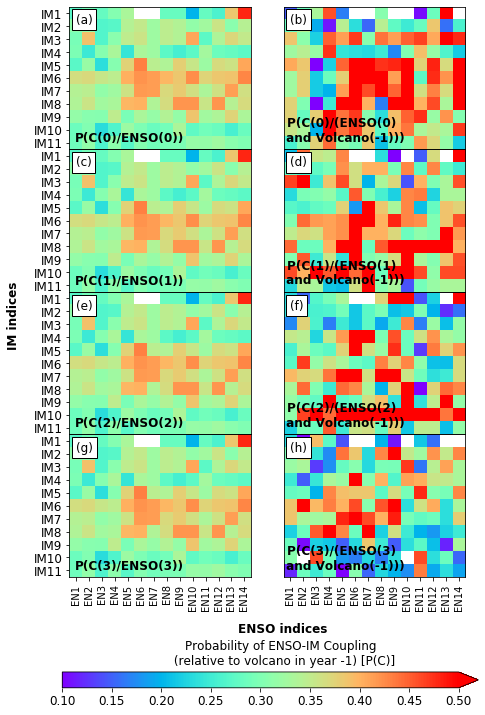

In [53]:
p_coupling_paleo_lag1 = np.genfromtxt('p_coupling_paleo_lag1.txt')
p_coupling_st_volc_paleo_lag1 = np.genfromtxt('p_coupling_st_volc_paleo_lag1.txt')

p_coupling_paleo_lag2 = np.genfromtxt('p_coupling_paleo_lag2.txt')
p_coupling_st_volc_paleo_lag2 = np.genfromtxt('p_coupling_st_volc_paleo_lag2.txt')

p_coupling_paleo_lag3 = np.genfromtxt('p_coupling_paleo_lag3.txt')
p_coupling_st_volc_paleo_lag3 = np.genfromtxt('p_coupling_st_volc_paleo_lag3.txt')

p_coupling_paleo_lag4 = np.genfromtxt('p_coupling_paleo_lag4.txt')
p_coupling_st_volc_paleo_lag4 = np.genfromtxt('p_coupling_st_volc_paleo_lag4.txt')

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']

fig = pl.figure(figsize=[8.5, 11.0])
ax1 = fig.add_axes([0.1, 0.12+0.05, 0.4, 0.18])
ax2 = fig.add_axes([0.1, 0.3+0.05, 0.4, 0.18])
ax3 = fig.add_axes([0.1, 0.48+0.05, 0.4, 0.18])
ax4 = fig.add_axes([0.1, 0.66+0.05, 0.4, 0.18])

ax5 = fig.add_axes([0.45, 0.12+0.05, 0.4, 0.18])
ax6 = fig.add_axes([0.45, 0.3+0.05, 0.4, 0.18])
ax7 = fig.add_axes([0.45, 0.48+0.05, 0.4, 0.18])
ax8 = fig.add_axes([0.45, 0.66+0.05, 0.4, 0.18])

im = ax4.imshow(p_coupling_paleo_lag1, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax3.imshow(p_coupling_paleo_lag2, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax2.imshow(p_coupling_paleo_lag3, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax1.imshow(p_coupling_paleo_lag4, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)

#fig.text(0.325, 0.92,'ENSO', ha='center', weight='bold')
    
im = ax8.imshow(p_coupling_st_volc_paleo_lag1, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax7.imshow(p_coupling_st_volc_paleo_lag2, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax6.imshow(p_coupling_st_volc_paleo_lag3, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax5.imshow(p_coupling_st_volc_paleo_lag4, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#fig.text(0.65,0.92, 'ENSO and Volcano(-1)', ha='center', weight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_yticks(ticks=np.arange(11))
    ax.set_yticklabels(yticklabels)
    ax.set_xticks([])
ax1.set_xticks(ticks=np.arange(14))
ax1.set_xticklabels(xticklabels)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')


for ax in [ax5, ax6, ax7, ax8]:
    ax.set_yticks([])
    ax.set_xticks([])
ax5.set_xticks(ticks=np.arange(14))
ax5.set_xticklabels(xticklabels)
for tick in ax5.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')

fig.text(0.5, 0.1, 'ENSO indices', ha='center', weight='bold')
fig.text(0.05, 0.5, 'IM indices', va='center', rotation='vertical', weight='bold')
    
fig.text(0.25, 0.72-3*0.18, 'P(C(3)/ENSO(3))', ha='center', weight='bold')
fig.text(0.25, 0.72-2*0.18, 'P(C(2)/ENSO(2))', ha='center', weight='bold')
fig.text(0.25, 0.72-0.18, 'P(C(1)/ENSO(1))', ha='center', weight='bold')
fig.text(0.25, 0.72, 'P(C(0)/ENSO(0))', ha='center', weight='bold')

fig.text(0.25+0.35, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and Volcano(-1)))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and Volcano(-1)))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and Volcano(-1)))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72, 'P(C(0)/(ENSO(0) \n and Volcano(-1)))', ha='center', weight='bold')

cbar_ax = fig.add_axes([0.14, 0.0+0.03, 0.68, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)

fig.text(0.5, 0.03+0.03, 'Probability of ENSO-IM Coupling \n (relative to volcano in year -1) [P(C)]', ha='center')
#cbar.ax.set_xticklabels( rotation='vertical')
 
t = fig.text(0.162, 0.329, '(g)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329, '(h)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+0.179, '(e)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+0.179, '(f)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+2*0.18, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+2*0.18, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+3*0.18, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+3*0.18, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))
pl.savefig('figs3.png', format='png', dpi=1000)

<ipython-input-54-501a079d0f22>:88: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(vmin=0.1, vmax=0.5)


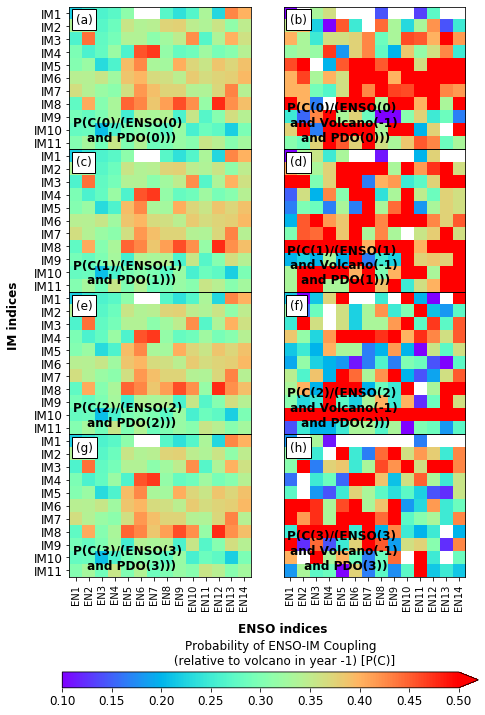

In [54]:
p_coupling_paleo_lag1 = np.genfromtxt('p_coupling_paleo_pdo_mann_lag1.txt')
p_coupling_st_volc_paleo_lag1 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag1.txt')

p_coupling_paleo_lag2 = np.genfromtxt('p_coupling_paleo_pdo_mann_lag2.txt')
p_coupling_st_volc_paleo_lag2 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag2.txt')

p_coupling_paleo_lag3 = np.genfromtxt('p_coupling_paleo_pdo_mann_lag3.txt')
p_coupling_st_volc_paleo_lag3 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag3.txt')

p_coupling_paleo_lag4 = np.genfromtxt('p_coupling_paleo_pdo_mann_lag4.txt')
p_coupling_st_volc_paleo_lag4 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_mann_lag4.txt')

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']
fig = pl.figure(figsize=[8.5, 11.0])
ax1 = fig.add_axes([0.1, 0.12+0.05, 0.4, 0.18])
ax2 = fig.add_axes([0.1, 0.3+0.05, 0.4, 0.18])
ax3 = fig.add_axes([0.1, 0.48+0.05, 0.4, 0.18])
ax4 = fig.add_axes([0.1, 0.66+0.05, 0.4, 0.18])

ax5 = fig.add_axes([0.45, 0.12+0.05, 0.4, 0.18])
ax6 = fig.add_axes([0.45, 0.3+0.05, 0.4, 0.18])
ax7 = fig.add_axes([0.45, 0.48+0.05, 0.4, 0.18])
ax8 = fig.add_axes([0.45, 0.66+0.05, 0.4, 0.18])

im = ax4.imshow(p_coupling_paleo_lag1, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax3.imshow(p_coupling_paleo_lag2, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax2.imshow(p_coupling_paleo_lag3, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax1.imshow(p_coupling_paleo_lag4, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)

#fig.text(0.325, 0.92,'ENSO', ha='center', weight='bold')
    
im = ax8.imshow(p_coupling_st_volc_paleo_lag1, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax7.imshow(p_coupling_st_volc_paleo_lag2, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax6.imshow(p_coupling_st_volc_paleo_lag3, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax5.imshow(p_coupling_st_volc_paleo_lag4, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#fig.text(0.65,0.92, 'ENSO and Volcano(-1)', ha='center', weight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_yticks(ticks=np.arange(11))
    ax.set_yticklabels(yticklabels)
    ax.set_xticks([])
ax1.set_xticks(ticks=np.arange(14))
ax1.set_xticklabels(xticklabels)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')


for ax in [ax5, ax6, ax7, ax8]:
    ax.set_yticks([])
    ax.set_xticks([])
ax5.set_xticks(ticks=np.arange(14))
ax5.set_xticklabels(xticklabels)
for tick in ax5.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')
    
fig.text(0.5, 0.1, 'ENSO indices', ha='center', weight='bold')
fig.text(0.05, 0.5, 'IM indices', va='center', rotation='vertical', weight='bold')
    
fig.text(0.25, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and PDO(3)))', ha='center', weight='bold')
fig.text(0.25, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and PDO(2)))', ha='center', weight='bold')
fig.text(0.25, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and PDO(1)))', ha='center', weight='bold')
fig.text(0.25, 0.72, 'P(C(0)/(ENSO(0) \n and PDO(0)))', ha='center', weight='bold')

fig.text(0.25+0.35, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and Volcano(-1) \n and PDO(3))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and Volcano(-1) \n and PDO(2)))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and Volcano(-1) \n and PDO(1)))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72, 'P(C(0)/(ENSO(0) \n and Volcano(-1) \n and PDO(0)))', ha='center', weight='bold')

cbar_ax = fig.add_axes([0.14, 0.0+0.03, 0.68, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)

fig.text(0.5, 0.03+0.03, 'Probability of ENSO-IM Coupling \n (relative to volcano in year -1) [P(C)]', ha='center')
#cbar.ax.set_xticklabels( rotation='vertical')
    
t = fig.text(0.162, 0.329, '(g)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329, '(h)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+0.179, '(e)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+0.179, '(f)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+2*0.18, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+2*0.18, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+3*0.18, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+3*0.18, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))
pl.savefig('figs5.png', format='png', dpi=1000)

<ipython-input-51-a163827220ba>:88: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(vmin=0.1, vmax=0.5)


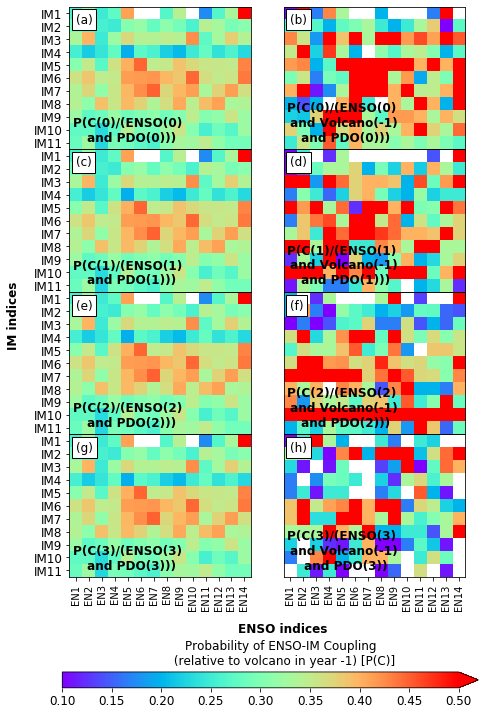

In [51]:
p_coupling_paleo_lag1 = np.genfromtxt('p_coupling_paleo_pdo_macdonald_lag1.txt')
p_coupling_st_volc_paleo_lag1 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_macdonald_lag1.txt')

p_coupling_paleo_lag2 = np.genfromtxt('p_coupling_paleo_pdo_macdonald_lag2.txt')
p_coupling_st_volc_paleo_lag2 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_macdonald_lag2.txt')

p_coupling_paleo_lag3 = np.genfromtxt('p_coupling_paleo_pdo_macdonald_lag3.txt')
p_coupling_st_volc_paleo_lag3 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_macdonald_lag3.txt')

p_coupling_paleo_lag4 = np.genfromtxt('p_coupling_paleo_pdo_macdonald_lag4.txt')
p_coupling_st_volc_paleo_lag4 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_macdonald_lag4.txt')

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']
fig = pl.figure(figsize=[8.5, 11.0])
ax1 = fig.add_axes([0.1, 0.12+0.05, 0.4, 0.18])
ax2 = fig.add_axes([0.1, 0.3+0.05, 0.4, 0.18])
ax3 = fig.add_axes([0.1, 0.48+0.05, 0.4, 0.18])
ax4 = fig.add_axes([0.1, 0.66+0.05, 0.4, 0.18])

ax5 = fig.add_axes([0.45, 0.12+0.05, 0.4, 0.18])
ax6 = fig.add_axes([0.45, 0.3+0.05, 0.4, 0.18])
ax7 = fig.add_axes([0.45, 0.48+0.05, 0.4, 0.18])
ax8 = fig.add_axes([0.45, 0.66+0.05, 0.4, 0.18])

im = ax4.imshow(p_coupling_paleo_lag1, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax3.imshow(p_coupling_paleo_lag2, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax2.imshow(p_coupling_paleo_lag3, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax1.imshow(p_coupling_paleo_lag4, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)

#fig.text(0.325, 0.92,'ENSO', ha='center', weight='bold')
    
im = ax8.imshow(p_coupling_st_volc_paleo_lag1, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax7.imshow(p_coupling_st_volc_paleo_lag2, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax6.imshow(p_coupling_st_volc_paleo_lag3, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax5.imshow(p_coupling_st_volc_paleo_lag4, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#fig.text(0.65,0.92, 'ENSO and Volcano(-1)', ha='center', weight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_yticks(ticks=np.arange(11))
    ax.set_yticklabels(yticklabels)
    ax.set_xticks([])
ax1.set_xticks(ticks=np.arange(14))
ax1.set_xticklabels(xticklabels)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')


for ax in [ax5, ax6, ax7, ax8]:
    ax.set_yticks([])
    ax.set_xticks([])
ax5.set_xticks(ticks=np.arange(14))
ax5.set_xticklabels(xticklabels)
for tick in ax5.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')
    
fig.text(0.5, 0.1, 'ENSO indices', ha='center', weight='bold')
fig.text(0.05, 0.5, 'IM indices', va='center', rotation='vertical', weight='bold')
    
fig.text(0.25, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and PDO(3)))', ha='center', weight='bold')
fig.text(0.25, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and PDO(2)))', ha='center', weight='bold')
fig.text(0.25, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and PDO(1)))', ha='center', weight='bold')
fig.text(0.25, 0.72, 'P(C(0)/(ENSO(0) \n and PDO(0)))', ha='center', weight='bold')

fig.text(0.25+0.35, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and Volcano(-1) \n and PDO(3))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and Volcano(-1) \n and PDO(2)))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and Volcano(-1) \n and PDO(1)))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72, 'P(C(0)/(ENSO(0) \n and Volcano(-1) \n and PDO(0)))', ha='center', weight='bold')

cbar_ax = fig.add_axes([0.14, 0.0+0.03, 0.68, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)

fig.text(0.5, 0.03+0.03, 'Probability of ENSO-IM Coupling \n (relative to volcano in year -1) [P(C)]', ha='center')
#cbar.ax.set_xticklabels( rotation='vertical')
    
t = fig.text(0.162, 0.329, '(g)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329, '(h)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+0.179, '(e)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+0.179, '(f)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+2*0.18, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+2*0.18, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+3*0.18, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+3*0.18, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

<ipython-input-56-d8d2ee824b37>:88: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(vmin=0.1, vmax=0.5)


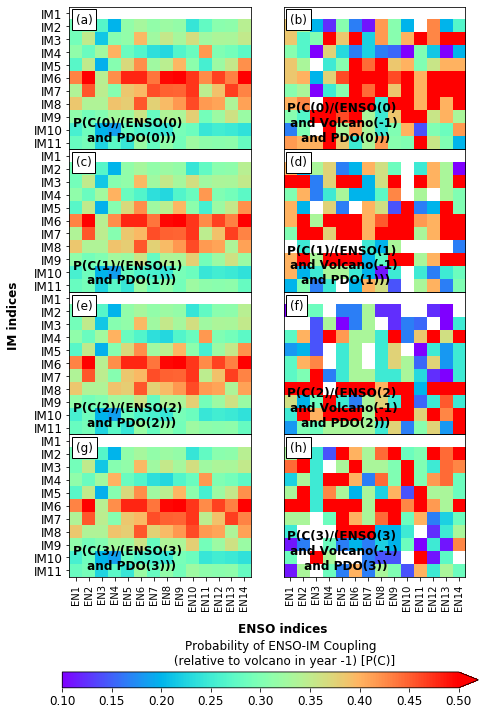

In [56]:
p_coupling_paleo_lag1 = np.genfromtxt('p_coupling_paleo_pdo_arrigo_lag1.txt')
p_coupling_st_volc_paleo_lag1 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_arrigo_lag1.txt')

p_coupling_paleo_lag2 = np.genfromtxt('p_coupling_paleo_pdo_arrigo_lag2.txt')
p_coupling_st_volc_paleo_lag2 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_arrigo_lag2.txt')

p_coupling_paleo_lag3 = np.genfromtxt('p_coupling_paleo_pdo_arrigo_lag3.txt')
p_coupling_st_volc_paleo_lag3 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_arrigo_lag3.txt')

p_coupling_paleo_lag4 = np.genfromtxt('p_coupling_paleo_pdo_arrigo_lag4.txt')
p_coupling_st_volc_paleo_lag4 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_arrigo_lag4.txt')

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']
fig = pl.figure(figsize=[8.5, 11.0])
ax1 = fig.add_axes([0.1, 0.12+0.05, 0.4, 0.18])
ax2 = fig.add_axes([0.1, 0.3+0.05, 0.4, 0.18])
ax3 = fig.add_axes([0.1, 0.48+0.05, 0.4, 0.18])
ax4 = fig.add_axes([0.1, 0.66+0.05, 0.4, 0.18])

ax5 = fig.add_axes([0.45, 0.12+0.05, 0.4, 0.18])
ax6 = fig.add_axes([0.45, 0.3+0.05, 0.4, 0.18])
ax7 = fig.add_axes([0.45, 0.48+0.05, 0.4, 0.18])
ax8 = fig.add_axes([0.45, 0.66+0.05, 0.4, 0.18])

im = ax4.imshow(p_coupling_paleo_lag1, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax3.imshow(p_coupling_paleo_lag2, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax2.imshow(p_coupling_paleo_lag3, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax1.imshow(p_coupling_paleo_lag4, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)

#fig.text(0.325, 0.92,'ENSO', ha='center', weight='bold')
    
im = ax8.imshow(p_coupling_st_volc_paleo_lag1, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax7.imshow(p_coupling_st_volc_paleo_lag2, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax6.imshow(p_coupling_st_volc_paleo_lag3, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax5.imshow(p_coupling_st_volc_paleo_lag4, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#fig.text(0.65,0.92, 'ENSO and Volcano(-1)', ha='center', weight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_yticks(ticks=np.arange(11))
    ax.set_yticklabels(yticklabels)
    ax.set_xticks([])
ax1.set_xticks(ticks=np.arange(14))
ax1.set_xticklabels(xticklabels)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')


for ax in [ax5, ax6, ax7, ax8]:
    ax.set_yticks([])
    ax.set_xticks([])
ax5.set_xticks(ticks=np.arange(14))
ax5.set_xticklabels(xticklabels)
for tick in ax5.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')
    
fig.text(0.5, 0.1, 'ENSO indices', ha='center', weight='bold')
fig.text(0.05, 0.5, 'IM indices', va='center', rotation='vertical', weight='bold')
    
fig.text(0.25, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and PDO(3)))', ha='center', weight='bold')
fig.text(0.25, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and PDO(2)))', ha='center', weight='bold')
fig.text(0.25, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and PDO(1)))', ha='center', weight='bold')
fig.text(0.25, 0.72, 'P(C(0)/(ENSO(0) \n and PDO(0)))', ha='center', weight='bold')

fig.text(0.25+0.35, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and Volcano(-1) \n and PDO(3))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and Volcano(-1) \n and PDO(2)))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and Volcano(-1) \n and PDO(1)))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72, 'P(C(0)/(ENSO(0) \n and Volcano(-1) \n and PDO(0)))', ha='center', weight='bold')

cbar_ax = fig.add_axes([0.14, 0.0+0.03, 0.68, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)

fig.text(0.5, 0.03+0.03, 'Probability of ENSO-IM Coupling \n (relative to volcano in year -1) [P(C)]', ha='center')
#cbar.ax.set_xticklabels( rotation='vertical')
    
t = fig.text(0.162, 0.329, '(g)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329, '(h)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+0.179, '(e)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+0.179, '(f)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+2*0.18, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+2*0.18, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+3*0.18, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+3*0.18, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))
pl.savefig('figs7.png', format='png', dpi=1000)

<ipython-input-55-5b7840a12dbb>:88: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(vmin=0.1, vmax=0.5)


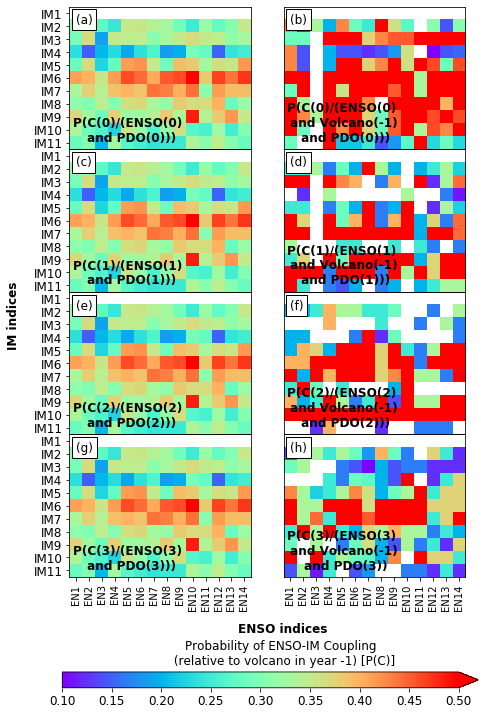

In [55]:
p_coupling_paleo_lag1 = np.genfromtxt('p_coupling_paleo_pdo_biondi_lag1.txt')
p_coupling_st_volc_paleo_lag1 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_biondi_lag1.txt')

p_coupling_paleo_lag2 = np.genfromtxt('p_coupling_paleo_pdo_biondi_lag2.txt')
p_coupling_st_volc_paleo_lag2 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_biondi_lag2.txt')

p_coupling_paleo_lag3 = np.genfromtxt('p_coupling_paleo_pdo_biondi_lag3.txt')
p_coupling_st_volc_paleo_lag3 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_biondi_lag3.txt')

p_coupling_paleo_lag4 = np.genfromtxt('p_coupling_paleo_pdo_biondi_lag4.txt')
p_coupling_st_volc_paleo_lag4 = np.genfromtxt('p_coupling_st_volc_paleo_pdo_biondi_lag4.txt')

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
xticklabels = ['EN1', 'EN2', 'EN3', 'EN4', \
              'EN5', 'EN6', 'EN7', 'EN8', \
              'EN9', 'EN10', 'EN11', 'EN12', \
              'EN13', 'EN14']

yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

yticklabels = ['IM1', 'IM2', 'IM3',  \
              'IM4', 'IM5', 'IM6', 'IM7', 'IM8',\
               'IM9', 'IM10', 'IM11']
fig = pl.figure(figsize=[8.5, 11.0])
ax1 = fig.add_axes([0.1, 0.12+0.05, 0.4, 0.18])
ax2 = fig.add_axes([0.1, 0.3+0.05, 0.4, 0.18])
ax3 = fig.add_axes([0.1, 0.48+0.05, 0.4, 0.18])
ax4 = fig.add_axes([0.1, 0.66+0.05, 0.4, 0.18])

ax5 = fig.add_axes([0.45, 0.12+0.05, 0.4, 0.18])
ax6 = fig.add_axes([0.45, 0.3+0.05, 0.4, 0.18])
ax7 = fig.add_axes([0.45, 0.48+0.05, 0.4, 0.18])
ax8 = fig.add_axes([0.45, 0.66+0.05, 0.4, 0.18])

im = ax4.imshow(p_coupling_paleo_lag1, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax3.imshow(p_coupling_paleo_lag2, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax2.imshow(p_coupling_paleo_lag3, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax1.imshow(p_coupling_paleo_lag4, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)

#fig.text(0.325, 0.92,'ENSO', ha='center', weight='bold')
    
im = ax8.imshow(p_coupling_st_volc_paleo_lag1, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax7.imshow(p_coupling_st_volc_paleo_lag2, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax6.imshow(p_coupling_st_volc_paleo_lag3, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
im = ax5.imshow(p_coupling_st_volc_paleo_lag4, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.5)
#fig.text(0.65,0.92, 'ENSO and Volcano(-1)', ha='center', weight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_yticks(ticks=np.arange(11))
    ax.set_yticklabels(yticklabels)
    ax.set_xticks([])
ax1.set_xticks(ticks=np.arange(14))
ax1.set_xticklabels(xticklabels)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')


for ax in [ax5, ax6, ax7, ax8]:
    ax.set_yticks([])
    ax.set_xticks([])
ax5.set_xticks(ticks=np.arange(14))
ax5.set_xticklabels(xticklabels)
for tick in ax5.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    tick.label.set_rotation('vertical')
    
fig.text(0.5, 0.1, 'ENSO indices', ha='center', weight='bold')
fig.text(0.05, 0.5, 'IM indices', va='center', rotation='vertical', weight='bold')
    
fig.text(0.25, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and PDO(3)))', ha='center', weight='bold')
fig.text(0.25, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and PDO(2)))', ha='center', weight='bold')
fig.text(0.25, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and PDO(1)))', ha='center', weight='bold')
fig.text(0.25, 0.72, 'P(C(0)/(ENSO(0) \n and PDO(0)))', ha='center', weight='bold')

fig.text(0.25+0.35, 0.72-3*0.18, 'P(C(3)/(ENSO(3) \n and Volcano(-1) \n and PDO(3))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72-2*0.18, 'P(C(2)/(ENSO(2) \n and Volcano(-1) \n and PDO(2)))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72-0.18, 'P(C(1)/(ENSO(1) \n and Volcano(-1) \n and PDO(1)))', ha='center', weight='bold')
fig.text(0.25+0.35, 0.72, 'P(C(0)/(ENSO(0) \n and Volcano(-1) \n and PDO(0)))', ha='center', weight='bold')

cbar_ax = fig.add_axes([0.14, 0.0+0.03, 0.68, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_clim(vmin=0.1, vmax=0.5)

fig.text(0.5, 0.03+0.03, 'Probability of ENSO-IM Coupling \n (relative to volcano in year -1) [P(C)]', ha='center')
#cbar.ax.set_xticklabels( rotation='vertical')
    
t = fig.text(0.162, 0.329, '(g)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329, '(h)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+0.179, '(e)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+0.179, '(f)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+2*0.18, '(c)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+2*0.18, '(d)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162, 0.329+3*0.18, '(a)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))

t = fig.text(0.162+0.35, 0.329+3*0.18, '(b)', fontsize=12)
t.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black'))
pl.savefig('figs6.png', format='png', dpi=1000)

In [ ]:
from load_state_of_system_ensemble import * 

In [48]:
delphi_inst = np.genfromtxt('delphi_inst.txt', delimiter=",", dtype=float)
ismr_phi_inst = np.genfromtxt('ismr_phi_inst.txt', delimiter=",", dtype=float)
nino_phi_inst = np.genfromtxt('nino3_phi_inst.txt', delimiter=",", dtype=float)
dvolc_years = np.genfromtxt('sigl_volc.txt', delimiter=",", dtype=float)[:,0]
dvolc_gvf = np.genfromtxt('sigl_volc.txt', delimiter=",", dtype=float)[:,1]
dvolc_source = np.genfromtxt('sigl_source_v1.txt', delimiter=",", dtype=float).flatten()[::-1]
dvolc = np.genfromtxt('sigl_volc.txt', delimiter=",", dtype=float)[:,1]

In [49]:
from load_data import * 
delphi_inst = np.genfromtxt('delphi_inst.txt', delimiter=",", dtype=float)
ismr_phi_inst = np.genfromtxt('ismr_phi_inst.txt', delimiter=",", dtype=float)
nino_phi_inst = np.genfromtxt('nino3_phi_inst.txt', delimiter=",", dtype=float)


<ipython-input-52-bf232166124e>:63: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  values_hist, bins_hist, _ = ax4.hist(delphi_hist_dist_2, normed=True, bins='sturges', alpha=0.5, label='historical(past 1000, 850-1850)', range=(0,1))
<ipython-input-52-bf232166124e>:64: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  values_hist_null, bins_hist_null, _ = ax4.hist(delphi_hist_null_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates', range=(0,1))
<ipython-input-52-bf232166124e>:67: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  values_hist, bins_hist, _ = ax3.hist(delphi_inst_dist_2, bins='sturges',normed=True, alpha=0.5, label='instrumental era (1871-2016)')#, range=(0,1))
<ipython-input-52-bf232166124

bins =  [1.31823969e-05 8.33439161e-02 1.66674650e-01 2.50005384e-01
 3.33336117e-01 4.16666851e-01 4.99997585e-01 5.83328319e-01
 6.66659052e-01 7.49989786e-01 8.33320520e-01 9.16651254e-01
 9.99981987e-01]


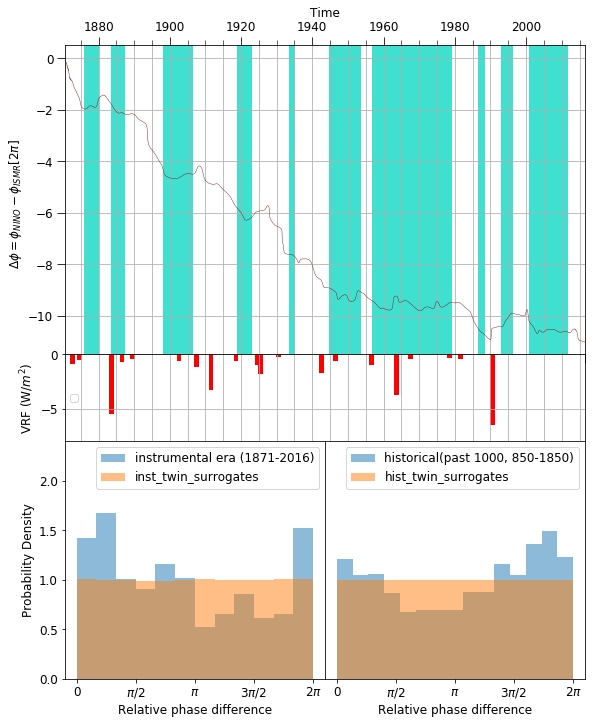

In [52]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

def delphi_timeseries(ct, del_phi, te, volc_time, dvolc_source, dvolc_gvf,  
                     delphi_hist_dist_2, delphi_hist_null_dist_2, delphi_inst, delphi_inst_dist_2,
                     delphi_null_inst_dist_2, it, te_inst, nino_phi_grad, ismr_phi_grad):
    """
    Plots the instantaneous phase diff with periods of phase sync highlighted.
    """
    # set up figure
    fig = pl.figure(figsize=[8.5, 11.0])
    axlabfs, tiklabfs, splabfs = 16, 14, 14
    start_year = 1871
    end_year = 2016

    # set up ax1 and plot delPhi and event series there
    ax1 = fig.add_axes([0.1, 0.52, 0.85, 0.4])
#     ax1.plot(ct, -del_phi/6.28,
#              c="Maroon", zorder=5, linewidth=0.4
#              )
    ax1.plot(it, -delphi_inst/6.28,
             c="Maroon", zorder=5, linewidth=0.4
             )
    ylo, yhi = ax1.get_ylim()
#     ax1.bar(te,
#             width = 200 * np.ones(len(te)),
#             height = (yhi - ylo) * np.ones(len(te)),
#             bottom = ylo * np.ones(len(te)),
#             edgecolor="none", facecolor="Turquoise",
#             zorder=1,)
    ax1.bar(te_inst,
            width = 200 * np.ones(len(te_inst)),
            height = (yhi - ylo) * np.ones(len(te_inst)),
            bottom = ylo * np.ones(len(te_inst)),
            edgecolor="none", facecolor="Turquoise",
            zorder=1,)
    # set up second ax2 and plot the volcanic radiative forcing 
    ax2 = fig.add_axes([0.1, 0.47-0.05, 0.85, 0.11])
    ax3 = fig.add_axes([0.1, 0.17-0.05, 0.425, 0.3])
    ax4 = fig.add_axes([0.525, 0.17-0.05, 0.425, 0.3])
    
    vtime = volc_time[dvolc_source==1]
    dvolc_tropical = dvolc_gvf[dvolc_source==1]
    #ax2.bar(vtime, dvolc_tropical, color='r', width=250)
    ax2.bar(vtime, dvolc_tropical, color='r', width=500)

    
    vtime = volc_time[dvolc_source==2]
    dvolc_nh = dvolc_gvf[dvolc_source==2]
    #ax2.bar(vtime, dvolc_nh, color='r', width=250)
    ax2.bar(vtime, dvolc_nh, color='r', width=500)

    vtime = volc_time[dvolc_source==3]
    dvolc_sh = dvolc_gvf[dvolc_source==3]
    #ax2.bar(vtime, dvolc_sh, color='r', width=250)
    ax2.bar(vtime, dvolc_sh, color='r', width=500)
    ax2.set_xlim([ct[0], 5])
    ax2.set_ylim([-8, 0])
    
    values_hist, bins_hist, _ = ax4.hist(delphi_hist_dist_2, normed=True, bins='sturges', alpha=0.5, label='historical(past 1000, 850-1850)', range=(0,1))
    values_hist_null, bins_hist_null, _ = ax4.hist(delphi_hist_null_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates', range=(0,1))
    #print("bins = ", bins_hist)

    values_hist, bins_hist, _ = ax3.hist(delphi_inst_dist_2, bins='sturges',normed=True, alpha=0.5, label='instrumental era (1871-2016)')#, range=(0,1))
    values_hist_null, bins_hist_null, _ = ax3.hist(delphi_null_inst_dist_2,normed=True,  bins=bins_hist, alpha=0.5, label='inst_twin_surrogates')#, range=(0,1))
    #ax3.set_xticklabels([
    #                     "0",
    #                     r"$\dfrac{\pi}{4}$",
    #                     r"$\dfrac{\pi}{2}$",
    #                     r"$\dfrac{3\pi}{4}$",
    #                     r"$\pi$",
    #                     r"$\dfrac{5\pi}{4}$",
    #                     r"$\dfrac{3\pi}{2}$",
    #                     r"$\dfrac{7\pi}{4}$",
    #                      r"$2\pi$",
    #                     ])
    
    print("bins = ", bins_hist)
    for ax in [ax3, ax4]:
        ax.set_xlabel('Relative phase difference')
        #ax.set_ylabel('Probability density')
        ax.legend()
        ax.set_xticks(np.arange(0, 1.1, step=0.25))
        ax.set_xticklabels(['0','$\pi$/2','$\pi$','3$\pi$/2','2$\pi$'], fontsize=12)
        ax.set_ylim([0, 2.4])
    ax3.set_ylabel('Probability Density', fontsize=12)
    ax4.get_yaxis().set_visible(False)
    
    #ax4.yaxis.tick_right()
    #ax4.set_ylabel('Probability Density')
    #ax4.yaxis.label_right()
        
    ax2.legend(loc='center left',  prop={'size': 10})
    
    ylo, yhi = ax1.get_ylim()
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax1.set_xlim(xlo, xhi)
#     XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
#     XMinorLocator = mdates.YearLocator(base=20, month=6, day=15)
    XMajorLocator = mdates.YearLocator(base=20, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=5, month=6, day=15)

    XMajorFormatter = mdates.DateFormatter("%Y")
    ax1.xaxis.set_major_locator(XMajorLocator)
    ax1.xaxis.set_minor_locator(XMinorLocator)
    ax1.xaxis.set_major_formatter(XMajorFormatter)
    #ax1.set_ylim(ylo, 1900)
    #ax1.set_ylim(ylo, 1900)
    #ax1.set_ylim(ylo, 4)
    ax1.set_ylim(-11.8, 0.5)
    ax1.xaxis.tick_top()
    
    #ax1.set_xticklabels([]) 
    #ax1.set_ylim(-12,12 )
    ax1.grid(which="both")
    ax1.tick_params(which="major", size=8, direction="out")
    ax1.tick_params(which="minor", size=5, direction="out")
    ax1.tick_params(axis="both", labelsize=tiklabfs)
#    ax1.set_xlabel("Time", fontsize=axlabfs)
    ax1.set_ylabel(r"$\Delta\phi = \phi_{NINO} - \phi_{ISMR}[2\pi]$", fontsize=14)
    #pl.rcParams.update({'font.size': 12})
#   ax1.set_ylabel(r"$\Delta\phi = \phi_{ISMR} - \phi_{NINO}[2\pi]$",
    #ax1.set_ylabel("Phase Locking Value \n (PLV)", fontsize=axlabfs)


    # prettify ax2
    xlo, xhi = dt.datetime(start_year, 1, 1), dt.datetime(end_year, 12, 31)
    ax2.set_xlim(xlo,xhi)
#     XMajorLocator = mdates.YearLocator(base=100, month=6, day=15)
#     XMinorLocator = mdates.YearLocator(base=50, month=6, day=15)
    XMajorLocator = mdates.YearLocator(base=20, month=6, day=15)
    XMinorLocator = mdates.YearLocator(base=5, month=6, day=15)

    
    XMajorFormatter = mdates.DateFormatter("%Y")
    ax2.xaxis.set_major_locator(XMajorLocator)
    ax2.xaxis.set_minor_locator(XMinorLocator)
    ax2.xaxis.set_major_formatter(XMajorFormatter)
    ylo, yhi = ax2.get_ylim()
    ax2.set_ylim(ylo, yhi)
    ax2.tick_params(axis="both", labelsize=tiklabfs)
    ax2.grid(which="both")
    ax2.set_ylabel("VRF (W/$m^2$)", fontsize=axlabfs)
    ax1.xaxis.set_label_position('top')
    ax1.set_xlabel("Time", fontsize=14)
    for ax in ([ax1, ax2, ax3, ax4]):
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
           ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(12)
    #fig.text(0,0,'Time')
    return None

def common_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(850, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time

def inst_time_axis(dismr, verbose=True):
    """
    Generates common time axis for Nino3 and ISMR time series.
    """
    # generate the time axis
    Nt = len(dismr)
    time = [dt.datetime(1871, 1, 15)]
    for i in range(1, len(dismr)):
        y = time[i - 1].year
        m = time[i - 1].month
        if m == 12:
            y += 1
            m = 0
        time.append(dt.datetime(y, m + 1, 15))
    time = np.array(time)

    return time

def zero_slope(data, chunksize =4, max_slope = .25):
    is_plateau = np.zeros((data.shape[0]))
    for index in range(0, len(data) - chunksize):
        chunk = data[index : index + chunksize]
        dy_dx =  abs(chunk[1:] - chunk[:-1]).sum()/chunksize
        if (0 <= dy_dx < max_slope):
            is_plateau[index] = 1.0
    return is_plateau

def yearly_time_axis(dvolc_years, verbose=True):
    """
    Generates time axis for yearly data 
    """
    Nt = len(dvolc_years)
    time = [dt.datetime(dvolc_years[0], 1, 15)]
    for i in range(1, len(dvolc_years)):
        time.append(dt.datetime(dvolc_years[i], 1, 15))
    time = np.array(time)

    return time



dvolc_tropical = dvolc.copy()
dvolc_nh = dvolc.copy()
dvolc_sh = dvolc.copy()

#is_tropical = np.zeros((dvolc.shape[0]))
#is_nh = np.zeros((dvolc.shape[0]))
#is_sh = np.zeros((dvolc.shape[0]))

#is_tropical[dvolc_source==1.0] = 1.0
#is_nh[dvolc_source==2.0] = 1.0
#is_sh[dvolc_source==3.0] = 1.0

#for i in range(dvolc.shape[0]):
#    #print("i = ", i)
#    dvolc_tropical[i] = dvolc[i] * is_tropical[i]
#    dvolc_nh[i] = dvolc[i] * is_nh[i]
#    dvolc_sh[i] = dvolc_sh[i] * is_sh[i]
#print(dvolc_tropical[0:100])
#print(dvolc_nh[0:100])
#print(dvolc_sh[0:100])

delphi_hist = np.genfromtxt('delphi.csv', delimiter=",", dtype=float).flatten()
delphi_inst = np.genfromtxt('delphi_inst.txt', delimiter=",", dtype=float)
win = 60
chunksize = win
max_slope = 0.04

#win = 24
#chunksize = win
#max_slope = 0.03


delphi_fit = np.zeros((delphi_hist.shape[0]))
delphi_fit[0:int(win/2)] = np.mean(delphi_hist[0:win])
delphi_fit[delphi_hist.shape[0]-int(win/2):] = np.mean(delphi_hist[delphi_hist.shape[0]-win:])
for i in range(int(win/2), delphi_hist.shape[0]-int(win/2)):
    delphi_fit[i] = np.mean(delphi_hist[i-int(win/2):i+int(win/2)])
is_plateau = zero_slope(delphi_fit, chunksize = chunksize, max_slope = max_slope)
for i in range(2,is_plateau.shape[0]-2):
    if (is_plateau[i-2]==is_plateau[i-1]==is_plateau[i+1]==is_plateau[i+2]):
        is_plateau[i] = is_plateau[i-1]

#is_plateau = np.genfromtxt('is_plateau.csv', delimiter=",", dtype=float).flatten()
idx = (is_plateau==1.0)
ct      = common_time_axis(delphi_hist)
te = ct[idx]

it = inst_time_axis(delphi_inst)

delphi_fit = np.zeros((delphi_inst.shape[0]))
delphi_fit[0:int(win/2)] = np.mean(delphi_inst[0:win])
delphi_fit[delphi_inst.shape[0]-int(win/2):] = np.mean(delphi_inst[delphi_inst.shape[0]-win:])
for i in range(int(win/2), delphi_inst.shape[0]-int(win/2)):
    delphi_fit[i] = np.mean(delphi_inst[i-int(win/2):i+int(win/2)])
is_plateau = zero_slope(delphi_fit, chunksize = chunksize, max_slope = max_slope)
for i in range(2,is_plateau.shape[0]-2):
    if (is_plateau[i-2]==is_plateau[i-1]==is_plateau[i+1]==is_plateau[i+2]):
        is_plateau[i] = is_plateau[i-1]
idx_inst = (is_plateau==1.0)
te_inst = it[idx_inst]

        
volc_time = yearly_time_axis(dvolc_years.astype(int))
delphi_hist_dist_2 = ( delphi_hist + np.pi) % (2 * np.pi )
delphi_hist_null_dist_2 = ( delphi_hist_null + np.pi) % (2 * np.pi )
delphi_inst_dist_2 = ( delphi_inst + np.pi) % (2 * np.pi )
delphi_null_inst_dist_2 = ( delphi_null_inst + np.pi) % (2 * np.pi )

delphi_hist_dist_2 = delphi_hist_dist_2 / (2*np.pi)
delphi_hist_null_dist_2 = delphi_hist_null_dist_2 / (2*np.pi)
delphi_inst_dist_2 = delphi_inst_dist_2 / (2*np.pi)
delphi_null_inst_dist_2 = delphi_null_inst_dist_2 / (2*np.pi)

delphi_inst_grad = np.gradient(delphi_inst)
nino_phi_inst_grad = np.gradient(nino_phi_inst)
ismr_phi_inst_grad = np.gradient(ismr_phi_inst)

delphi_hist = np.genfromtxt('delphi_hist.csv', delimiter=",", dtype=float).flatten()
ismr_phi_hist = np.genfromtxt('ismr_phi_hist.csv', delimiter=",", dtype=float)
nino_phi_hist = np.genfromtxt('nino_phi_hist.csv', delimiter=",", dtype=float)

delphi_hist_grad = np.gradient(delphi_hist)
nino_phi_hist_grad = np.gradient(nino_phi_hist)
ismr_phi_hist_grad = np.gradient(ismr_phi_hist)

win = 6
nino_phi_inst_grad_volc = []
nino_phi_inst_grad_novolc = []
ismr_phi_inst_grad_volc = []
ismr_phi_inst_grad_novolc = []

delphi_timeseries(ct, delphi_hist, te, volc_time, dvolc_source, dvolc_gvf,
                 delphi_hist_dist_2, delphi_hist_null_dist_2, delphi_inst, delphi_inst_dist_2,
                 delphi_null_inst_dist_2, it, te_inst, nino_phi_hist_grad, ismr_phi_hist_grad)
matplotlib.rc('font', **font)

# 5 year window after volcanic eruption selected
pl.savefig('figs2.png', format='png', dpi=1000)